### Add random baseline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy import interpolate
import pandas as pd
#plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.linewidth'] = 1  # 图框宽度
plt.rcParams['figure.dpi'] = 300  # plt.show显示分辨率
plt.rcParams['mathtext.fontset'] = 'stix' # 公式的字体可以是这样 formula font
''''''
font = {'family': 'serif',
        'serif': 'Times New Roman', 
        'weight': 'normal',
        #'size': 10
        }
plt.rc('font', **font)

def inter(x, y):
    '''
    -x: Raman Shift
    -y: Raman Intensity
    Returns:
    - x_pred, y_pred, the interpolated x, y
    '''
    x = np.array(x)[0:2001]
    y = np.array(y)[0:2001]
    f1 = interpolate.interp1d(x, y, kind='linear')
    x_pred = np.linspace(np.min(x), np.max(x), num=4096)
    y_pred = f1(x_pred)
    return x_pred, y_pred

path = r'data\10_乙醇-正丙醇#2-3\10_乙醇-正丙醇#2-31.csv' # path
csvdata = pd.read_csv(path, header=None)
ramanshift = csvdata.iloc[:,0]
intensity = csvdata.iloc[:,1]
ramanshift, intensity = inter(ramanshift, intensity)
intensity = ( intensity - np.min(intensity) )/( np.max(intensity) - np.min(intensity) )

# 给数据添加一些随机的基线噪声，噪声的幅度可以通过scale参数调整
scale = 100 # 噪声幅度
noise = np.random.normal(0, scale, size=len(ramanshift)) # 生成正态分布的噪声
min_noise = np.min(noise)
abs_noise = abs(min_noise)
y_noise = noise + abs_noise # 噪声叠加到数据上
y_noise  = ( y_noise  - np.min(y_noise ) )/( np.max(y_noise ) - np.min(y_noise ) )

# 用平滑滤波器去除噪声中的高频成分，平滑的程度可以通过window_length和polyorder参数调整
window_length = 4096 # 滤波窗口的长度，必须是奇数
polyorder = 4 # 拟合多项式的阶数
y_smooth = savgol_filter(y_noise, window_length, polyorder) # 平滑滤波
y_smooth  = ( y_smooth - np.min(y_smooth ) )/( np.max(y_smooth ) - np.min(y_smooth ) )
final_intensity = y_smooth+intensity
final_intensity = (final_intensity - np.min(final_intensity) )/( np.max(final_intensity) - np.min(final_intensity) )


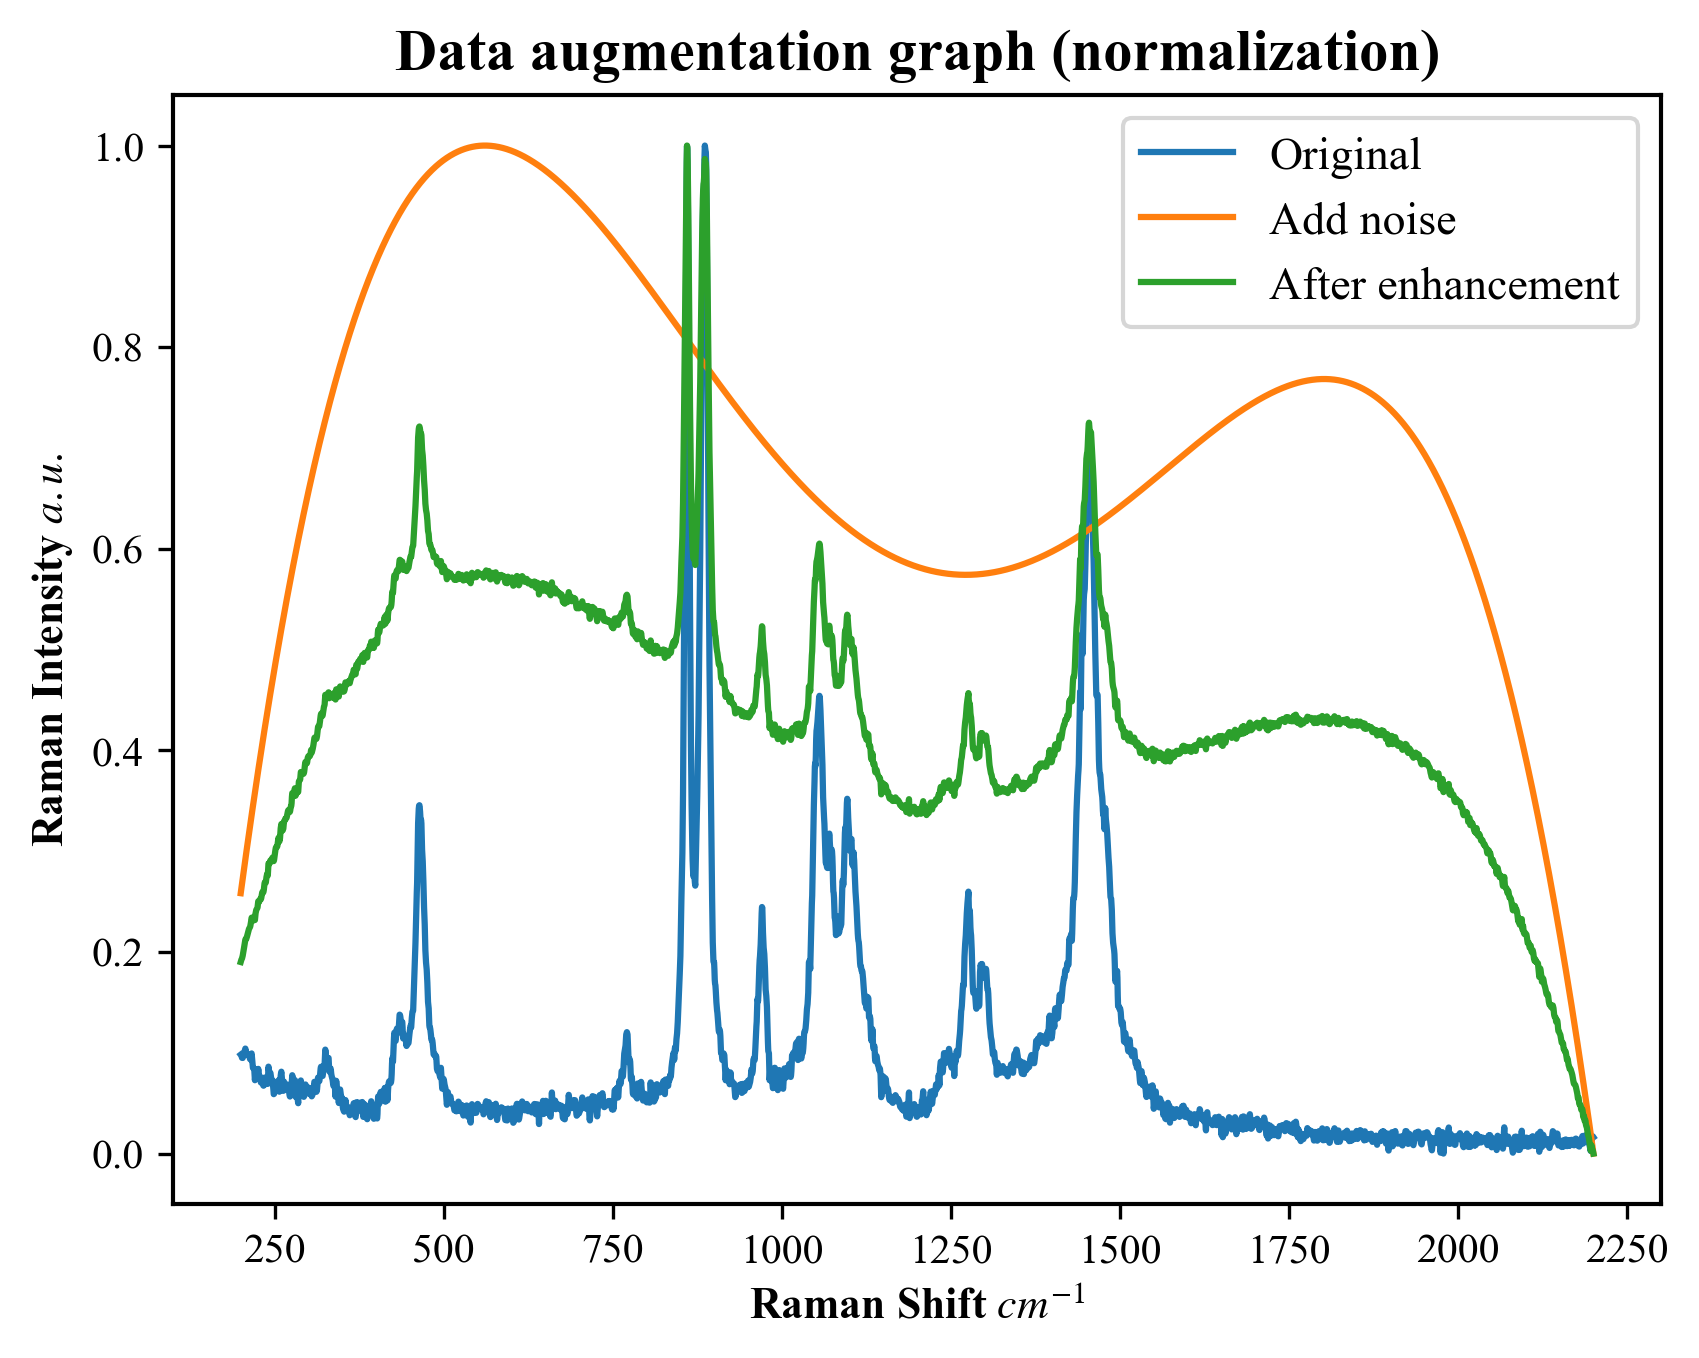

In [4]:
# 绘制原始数据，添加噪声后的数据，和平滑后的数据的对比图
plt.plot(ramanshift, intensity, label='Original')
#plt.plot(x, y_noise, label='With noise')
plt.plot(ramanshift, y_smooth, label='Add noise')
plt.plot(ramanshift,final_intensity , label='After enhancement')
plt.xlabel('Raman Shift ${cm}^{-1}$',fontsize=10.5,fontweight= 'black')
plt.ylabel('Raman Intensity ${a.u.}$',fontsize=10.5,fontweight= 'black')
plt.title('Data augmentation graph (normalization)',fontsize=14,fontweight= 'black')
plt.legend(prop={'size':11},loc ='upper right')
#plt.savefig('数据增强n' + '.png',dpi=300,bbox_inches='tight')#,pad_inches=0.1,pad_inches=0.1
#plt.savefig('数据增强n' + '.tif', format="tif",dpi=300,bbox_inches='tight')

plt.show()